# Machine Learning Classifier Algorithms with Scikit Learn

The five steps that are involved in training a supervised machine learning model:

1. Select features and collect labeled training examples
2. Choose a performance metric
3. Choose a learning algorithm and train the model
4. Evaluate the performance of the model
5. Change settings of the algorithm and tune the model

In [71]:
# Dataset
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print(f"Class labels: {np.unique(y)}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Class labels: [0 1 2]


In [72]:
# Preprocessing
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Perceptron Implementation

In [73]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print(f"Misclassified examples: {sum(y_pred != y_test)}")
print(f"Accuracy: {round(accuracy_score(y_test, y_pred), 2)}")
print(f"Accuracy: {round(ppn.score(X_test_std, y_test), 2)}")

Misclassified examples: 1
Accuracy: 0.98
Accuracy: 0.98


In [74]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('o', 's', '^', 'v', '<')
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f"Class {cl}",
                    edgecolor="black")
    # highlight test examples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',s=100, label='Test set')

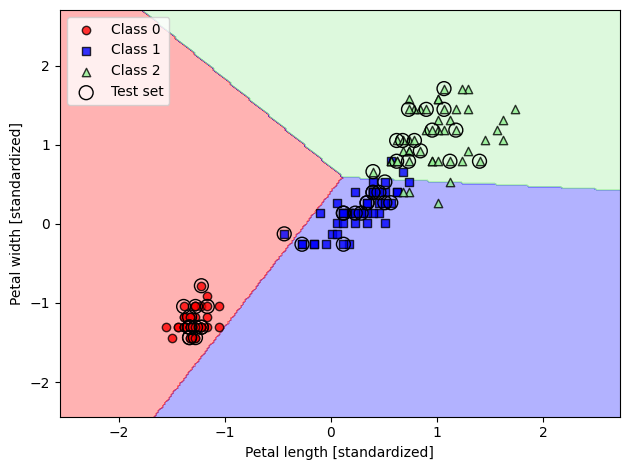

In [75]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_std, y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

### Logistic Regression (with multiclass classification)

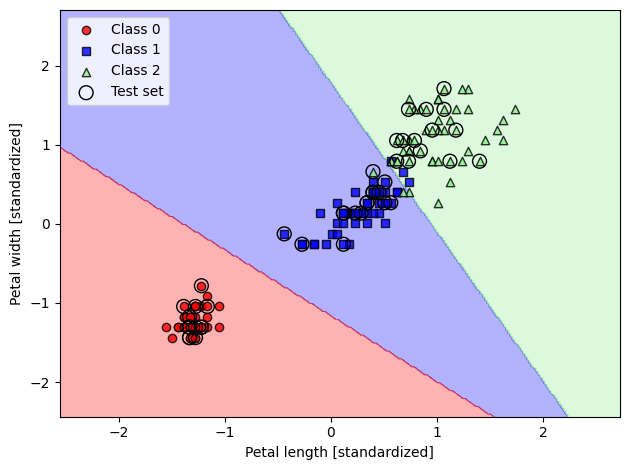

In [76]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, solver="lbfgs")
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

*What is the C parameter for?*

The concept for this parameter is related to regularization, where decreasing the value of C increases the bias (underfitting) and lowers the variance (overfitting) of the model.

In [77]:
lr.predict_proba(X_test_std[:3, :])

array([[9.37368464e-13, 3.91458193e-04, 9.99608542e-01],
       [9.93631074e-01, 6.36892585e-03, 1.20730798e-15],
       [9.98707332e-01, 1.29266792e-03, 1.82177043e-17]])

In [78]:
lr.predict(X_test_std[:3, :])
# Returned array gives the class id for every row

array([2, 0, 0])

In [79]:
print(X_test_std[0, :])
print(X_test_std[0, :].reshape(1, -1))

[0.89820289 1.44587881]
[[0.89820289 1.44587881]]


### Support Vector Machine

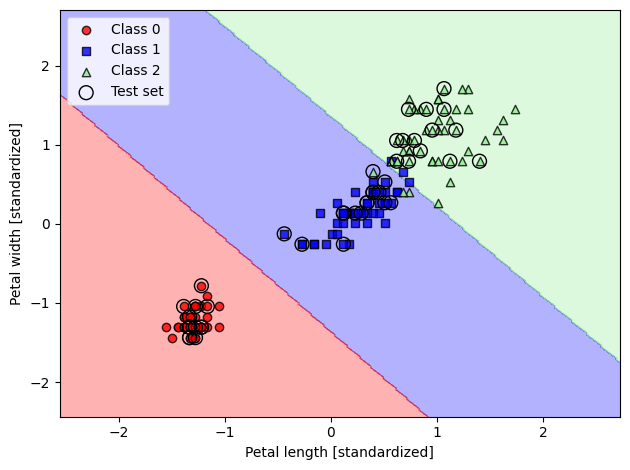

In [80]:
from sklearn.svm import SVC
svm = SVC(kernel="linear", C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()


*What is the difference between Logistic Regression and Support Vector Machines?*

Logistic Regression models are more prone to outliers as they try to maximize the conditional likelihoods of the training data. On the other hand, SVMs are more complex and not that easy to understand mathematically. Also, Logistic Regression can be updated easily when working with streaming data.

### SGDClassifier Implementations (for large datasets that don't fit in memory)

In [81]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss="perceptron")
lr = SGDClassifier(loss="log")
svm = SGDClassifier(loss="hinge")

### SVM for non-linear data

X: (200, 2) Y: (200,)


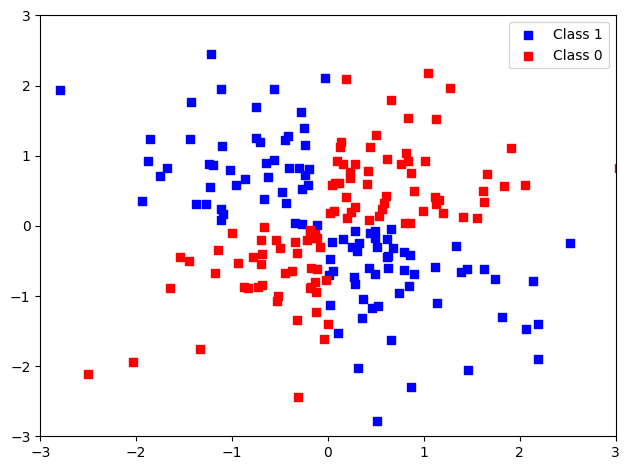

In [82]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)
print(f"X: {X_xor.shape} Y: {y_xor.shape}")
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='blue', marker='s', label='Class 1')
plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1], c='red', marker='s', label='Class 0')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc="best")
plt.tight_layout()
plt.show()

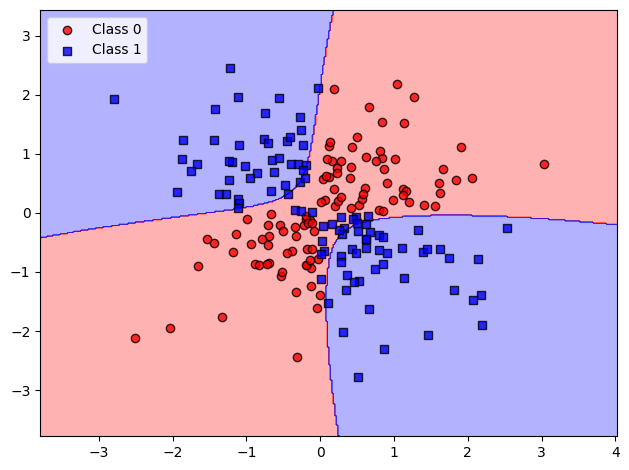

In [83]:
svm = SVC(kernel="rbf", random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

*What is the gamma parameter for?*

The gamma parameter can be understood as a cut-off parameter for the Gaussian sphere. If the value for gamma is increased, the influence or reach of the training examples is increased, which leads to a tighter and bumpier decision boundary. For a better understanding, take a look at the next example.

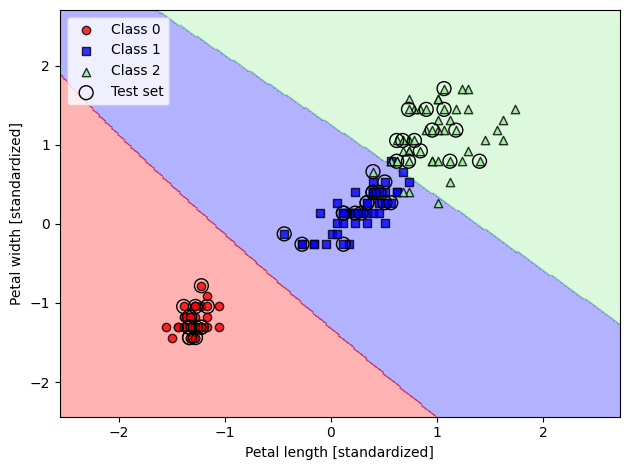

In [84]:
svm = SVC(kernel="rbf", random_state=1, gamma=0.1, C=1.0) # Very small value for gamma
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

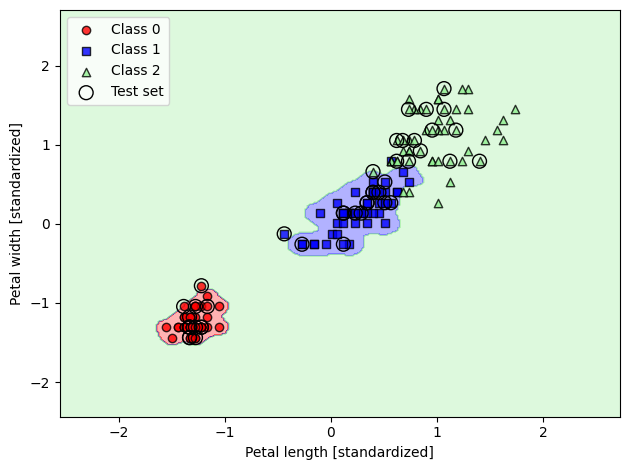

In [85]:
svm = SVC(kernel="rbf", random_state=1, gamma=100.0, C=1.0) # Very high value for gamma
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()